# Assignment for Applied Machine Learning 
## Exploring the Rosetta Stone of Human Capital
>Stergios Sozos 8170129
>
>Department of Management Science and Technology
>
>Athens University of Economics and Business
>
>stergiossozos@outlook.com

***


## Important information!
In order to read the files needed for the assignment, we need to download them and move them to the appropriate paths. To be more specific:

The 3 following files should be extracted (unziped) in a folder named "rosetta_stone_assignment_data". This folder needs to be created in the path where our assignment file is saved.
* ```US 2000 Census``` Data.  

* ```BACI (Base Pour L’ Analyse du Commerce International) Country Trade``` Data.

* ```Country Codes``` file

The 6 follwing files need to be saved in a folder named "DATA". The "DATA" folder needs to be created in a folder called "Replication Files". For example the path wil be "root folder/Replication Files/DATA/examplefile".

* ```cw_ind2000_ind1990ddx.dta``` 
* ```cw_hs6_sic87dd.dta``` 
* ```cw_sic87_ind1990ddx.dta``` 
* ```BL2013_MF1599_v2.2.dta``` 
* ```HLO Panel Data (mean, thresh) - Jan 2018.dta```
* ```WDI_data.csv```

In the root folder (where the notebook is saved) we will have the follwing file:
* ```patel-sandefur-human-capital-final-results.xlsx```
   


Before we start, we will import some libraries that we will need later, and set some options for pandas that we will need for displaying the data.

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats


%matplotlib inline

import matplotlib

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)
#pd.set_option('float_format', '{:f}'.format)

We are also informed that we are going to need the following files:
* ```US 2000 Census``` Data. 

* ```BACI (Base Pour L’ Analyse du Commerce International) Country Trade``` Data.

* ```Country Codes``` file

So we are going to read them and pass them in dataframes

```Read_csv``` function won't work with its default settings for ```Country_Codes```, as an error about the UTF-8 encoding occurs. Thus we first explore the encoding of the file.

In [2]:
with open(r'rosetta_stone_assignment_data\country_codes_V202001.csv') as f:
    print(f)

<_io.TextIOWrapper name='rosetta_stone_assignment_data\\country_codes_V202001.csv' mode='r' encoding='cp1252'>


We can now use the 'cp1252' encoding parameter and pass our data from the csv file into a dataframe.

In [3]:
#Read csv file
Country_Codes = pd.read_csv(r'rosetta_stone_assignment_data\country_codes_V202001.csv', encoding='cp1252')
#Visualise the dataframe created
Country_Codes

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


In [4]:
#Read csv file
US_2000_Census = pd.read_csv(r'rosetta_stone_assignment_data\usa_00001.csv')
#Visualise the dataframe created
US_2000_Census

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


In [5]:
#Read csv file
BACI = pd.read_csv(r'rosetta_stone_assignment_data\BACI_HS17_Y2018_V202001.csv')
#Visualise the dataframe created
BACI

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


We will also read the file that contains the results of the study and name the dataframe as "country_scores"

In [6]:
#Read excel file
country_scores = pd.read_excel(open('patel-sandefur-human-capital-final-results.xlsx','rb'), sheet_name='Country Scores')
#Visualise the dataframe created
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


# First Question
### "Income and Test Results"

For the first question we will study the relationship between income and the TIMSS and PIRLS score, as in Section 4.1 and Figure 5 of the original paper.

In order to do this, except for the country scores, we will need the following file:

* ```WDI_data.csv```, which contains income data per country as given by the World Bank.

Then we will be able to investigate the relationship between logged income and TIMMS, and logged income and PIRLS. We will then give the summary table of our model and Plot the two relationships.




We will now read the ```WDI_data.csv``` file.

In [7]:
# Read data
WDI_data = pd.read_csv(r'Replication Files\DATA\WDI_data.csv')
#Visulise last 10 rows
WDI_data.tail(10)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..
791,Zimbabwe,ZWE,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN
796,Last Updated: 05/21/2018,NaN,NaN,NaN,NaN


The last data row is 791, and the rest is information for the data provided. Thus, we will remove rows 792-796

In [8]:
#Keep rows between 0 and 791
WDI_data = WDI_data.loc[0:791,:]
#Visualise the dataframe created
WDI_data.head(10)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
5,Albania,ALB,"School enrollment, primary (% gross)",SE.PRM.ENRR,109.76244354248
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
7,Algeria,DZA,"School enrollment, primary (% net)",SE.PRM.NENR,97.508171081543
8,Algeria,DZA,"School enrollment, primary (% gross)",SE.PRM.ENRR,115.718521118164
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..


We will also rename the column 2015 to income(It's not exactly that but later we will keep the rows that contain gdp and then it will be truly the income)

In [9]:
WDI_data = WDI_data.rename(columns={"2015 [YR2015]": "Income"})
WDI_data

,Country Name,Country Code,Series Name,Series Code,Income
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


Now we will merge WDI_data and country_scores based on the country code, and thus we will have a table containing both the TIMSS & PIRLS score per country and the income per country (we will have exactly the income in the next steps as we explained above). 

In [10]:
scores_with_income = pd.merge(WDI_data, 
               country_scores, 
               on='Country Code',
               how='inner')
scores_with_income

,Country Name,Country Code,Series Name,Series Code,Income,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688,Argentina,51.000000,66.0,406.652557,431.443542
1,Argentina,ARG,"School enrollment, primary (% net)",SE.PRM.NENR,99.3935928344727,Argentina,51.000000,66.0,406.652557,431.443542
2,Argentina,ARG,"School enrollment, primary (% gross)",SE.PRM.ENRR,109.926261901855,Argentina,51.000000,66.0,406.652557,431.443542
3,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571,Armenia,71.505402,NaN,454.000000,NaN
4,Armenia,ARM,"School enrollment, primary (% net)",SE.PRM.NENR,92.4729690551758,Armenia,71.505402,NaN,454.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
229,Uruguay,URY,"School enrollment, primary (% net)",SE.PRM.NENR,97.2386779785156,Uruguay,57.000000,70.0,424.912933,450.448608
230,Uruguay,URY,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.423179626465,Uruguay,57.000000,70.0,424.912933,450.448608
231,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357,Yemen,9.265388,NaN,243.000000,NaN
232,"Yemen, Rep.",YEM,"School enrollment, primary (% net)",SE.PRM.NENR,..,Yemen,9.265388,NaN,243.000000,NaN


From this table we need only the columns Country,Income, Median TIMSS and Median PIRLS.

Also we will now keep only the rows that contain GDP per capita which will make the income column reflect the income.

In [11]:
scores_with_income = scores_with_income[scores_with_income['Series Name'].isin(['GDP per capita, PPP (constant 2011 international $)'])]
scores_with_income =scores_with_income[["Country Code","Country Name","Income","Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"]]
scores_with_income

,Country Code,Country Name,Income,"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,ARG,Argentina,19101.2973920688,406.652557,431.443542
3,ARM,Armenia,8195.93364956571,454.000000,NaN
6,AUS,Australia,43719.5021648696,520.000000,534.000000
9,AUT,Austria,44353.8752139122,511.000000,533.000000
12,AZE,Azerbaijan,16698.8636532538,465.000000,467.000000
...,...,...,...,...,...
219,TUR,Turkey,23388.4813019367,477.000000,NaN
222,ARE,United Arab Emirates,65975.3755468552,437.000000,440.000000
225,USA,United States,53029.2933612438,544.000000,560.000000
228,URY,Uruguay,19831.4458942372,424.912933,450.448608


### We will start our analysis with the relationship of income to TIMSS

Now we will create a table containing only the income and the TIMSS score. We will also change the big name of the column to just TIMSS.

In [12]:
# New dataframe for TIMSS only
income_and_timss = scores_with_income[["Country Code","Income","Median Math Score (TIMSS Scale, 4th Grade)"]]
# make name pythonic and relevant
income_and_timss = income_and_timss.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)": "timss"})
income_and_timss

,Country Code,Income,timss
0,ARG,19101.2973920688,406.652557
3,ARM,8195.93364956571,454.000000
6,AUS,43719.5021648696,520.000000
9,AUT,44353.8752139122,511.000000
12,AZE,16698.8636532538,465.000000
...,...,...,...
219,TUR,23388.4813019367,477.000000
222,ARE,65975.3755468552,437.000000
225,USA,53029.2933612438,544.000000
228,URY,19831.4458942372,424.912933


We will now check if there are any NaN values in the dataframe and in which column, and remove them in the next step

In [13]:
# check if there are NaN values
income_and_timss.isna().sum()

Country Code    0
Income          0
timss           7
dtype: int64

In [14]:
# Remove NaN values
income_and_timss.dropna(inplace=True)
income_and_timss.sort_values(by='timss', inplace=True)
income_and_timss.reset_index(drop=True, inplace=True)
income_and_timss.head()

,Country Code,Income,timss
0,YEM,2641.04582911357,243.000000
1,DOM,13371.524988334,303.594055
2,NER,904.579781260038,312.077209
3,MAR,7296.93440143191,329.000000
4,PRY,8639.28684970737,336.329132


Now if we try to do any analysis with this table, an error will occur as income is not passed as a number. Let's see its type so we can change it.

In [15]:
income_and_timss.dtypes

Country Code     object
Income           object
timss           float64
dtype: object

We will now change its type to float.

In [16]:
income_and_timss["Income"] = income_and_timss.Income.astype(float)

As the question requires, we will copy this table to create a new one and change the income to the log of the income.

In [17]:
# copy income timss table
income_and_timss_log = income_and_timss.copy()
# change income to log
income_and_timss_log["Income"] = np.log(income_and_timss_log["Income"])

We can now perform a regression analysis with the timss as a dependent variable

In [18]:
mod = smf.ols("timss ~ Income", data=income_and_timss_log)
timss_income_result = mod.fit()
timss_income_result.params

Intercept    46.117041
Income       41.745974
dtype: float64

We will now print a summary of all regression results and parametres.

In [19]:
timss_income_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  timss   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        15:59:48   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
Income        41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The low R-Squared indicates that the model explains very little of the variability of the response data around its mean.(100% indicates that the model explains all the variability of the response data around its mean, and 0% none of the variability.)

The p-value is above 0,05 which is a bad sign and can be interpreted as that the result may not be accurate.

#### Plot the relationship

We can also plot the relationship between TIMSS and income:

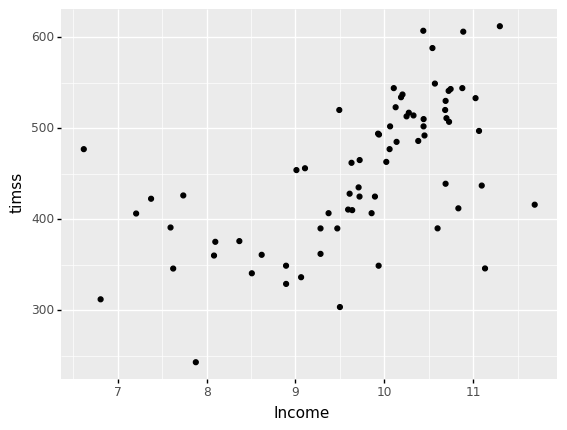

<ggplot: (163753824772)>

In [20]:
ggplot(data=income_and_timss_log) + geom_point(aes(x='Income', y='timss'))

We can also add on the plot the line we created with the regression analysis:

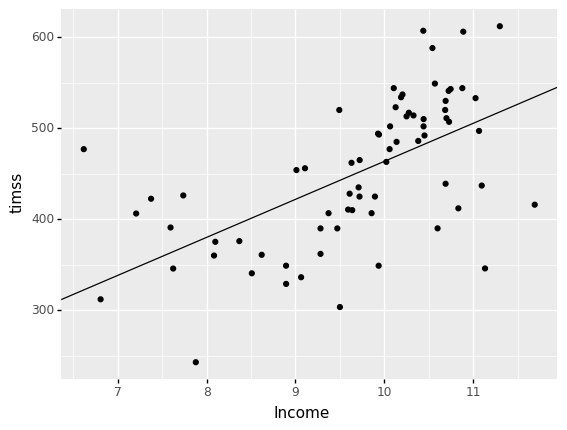

<ggplot: (163754549194)>

In [21]:
ggplot(data=income_and_timss_log) +\
    geom_point(mapping=aes(x='Income', y='timss')) +\
    geom_abline(intercept=timss_income_result.params['Intercept'], 
                slope=timss_income_result.params['Income'])


We can see on the plot that although some of the points are very close to the line created from the regression, there are many points that are  very far from the line. This was expected from the summary of the regression model.

### We will continue our analysis with the relationship of income to PIRLS

In [22]:
# New dataframe for PIRLS only
income_and_pirls = scores_with_income[["Country Code","Income","Median Reading Score (PIRLS Scale, 4th Grade)"]]
# make name pythonic and relevant
income_and_pirls = income_and_pirls.rename(columns={"Series Name": "income", 
                                    "Median Reading Score (PIRLS Scale, 4th Grade)": "pirls"})
income_and_pirls

,Country Code,Income,pirls
0,ARG,19101.2973920688,431.443542
3,ARM,8195.93364956571,NaN
6,AUS,43719.5021648696,534.000000
9,AUT,44353.8752139122,533.000000
12,AZE,16698.8636532538,467.000000
...,...,...,...
219,TUR,23388.4813019367,NaN
222,ARE,65975.3755468552,440.000000
225,USA,53029.2933612438,560.000000
228,URY,19831.4458942372,450.448608


We will now check if there are any NaN values in the dataframe and in which column, and remove them in the next step

In [23]:
income_and_pirls.isna().sum()

Country Code     0
Income           0
pirls           10
dtype: int64

In [24]:
# Remove NaN values
income_and_pirls.dropna(inplace=True)
income_and_pirls.sort_values(by='pirls', inplace=True)
income_and_pirls.reset_index(drop=True, inplace=True)
income_and_pirls.head()

,Country Code,Income,pirls
0,MAR,7296.93440143191,306.000000
1,ZAF,12362.5838136118,323.000000
2,NER,904.579781260038,336.778412
3,TCD,2047.63717935419,340.711487
4,DOM,13371.524988334,361.333984


Now if we try to do any analysis with this table, an error will occur as income is not passed as a number. Let's see its type so we can change it.

In [25]:
income_and_pirls.dtypes

Country Code     object
Income           object
pirls           float64
dtype: object

We will now change its type to float.

In [26]:
income_and_pirls["Income"] = income_and_pirls.Income.astype(float)

As the question requires, we will copy this table to create a new one and change the income to the log of the income.

In [27]:
income_and_pirls_log = income_and_pirls.copy()
income_and_pirls_log["Income"] = np.log(income_and_pirls_log["Income"])

We can now perform a regression analysis with the PIRLS as a dependent variable

In [28]:
modpirls = smf.ols("pirls ~ Income", data=income_and_pirls_log)
pirls_income_result = modpirls.fit()
pirls_income_result.params

Intercept    42.619127
Income       43.912415
dtype: float64

We will now print a summary of all regression results and parametres

In [29]:
pirls_income_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pirls   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        15:59:49   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
Income        43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared here is higher, which indicates that the model explains some of the variability of the response data around its mean.

The p-value is above 0,05 which is a bad sign and can be interpreted as that the result is probably not accurate.

#### Plot the relationship

We can also plot the relationship between TIMSS and income:

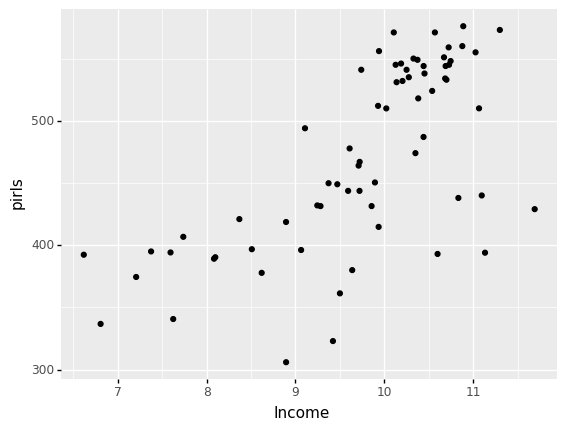

<ggplot: (163754641032)>

In [30]:
ggplot(data=income_and_pirls_log) + geom_point(aes(x='Income', y='pirls'))

We can also add on the plot the line we created with the regression analysis:

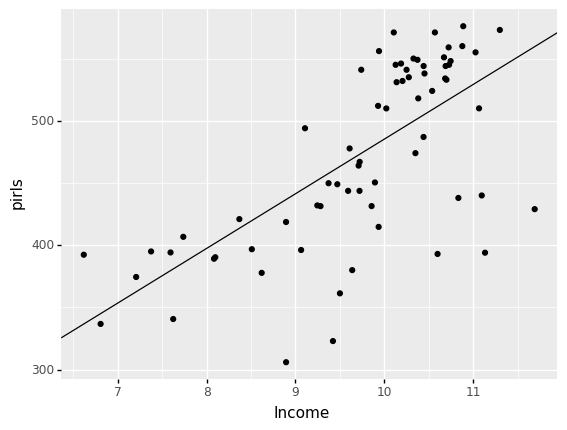

<ggplot: (163754649064)>

In [31]:
ggplot(data=income_and_pirls_log) +\
    geom_point(mapping=aes(x='Income', y='pirls')) +\
    geom_abline(intercept=timss_income_result.params['Intercept'], 
                slope=pirls_income_result.params['Income'])


We can see on the plot that although some of the points are very close to the line created from the regression, there are many points that are  very far from the line. This was expected from the summary of the regression model and we will try to find other factors that affect timss anr pirls later on.

# Second Question
### "Years of Schooling and Test Scores"

We will explore how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper. 
To do that, we will need to take the residuals of the models we created in The first Question; the residuals contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.

Apart from country_scores, we will need the following file:

* ```BL2013_MF1599_v2.2.dta```, which contains average years of schooling data. We will use the values reported for 2010.

We already have the residuals for TIMSS and PIRLS; We have to fit a model for the the logged per capita GDP in 2015 (independent variable) and the years of schooling (dependent variable). 

We will then show the results of our model and get the residuals. These residuals describe the years of schooling that cannot be explained by income. Then, we will run a regression between the TIMMS residuals and the schooling residuals, and another regression between the PIRLS residuals and the schooling residuals. 

Finally, we will show the model results and related figures.


In order to start we will read the ```BL2013_MF1599_v2.2.dta``` file

In [32]:
#Read data
schoolingYears = pd.read_stata(r'Replication Files\DATA\BL2013_MF1599_v2.2.dta')
#Visulise the dataframe created.
schoolingYears

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,358.0,Ukraine,1990.0,MF,15.0,999.0,5.785368,14.138213,11.648808,59.848248,41.504124,20.228174,12.362464,9.531308,4.706372,4.173123,0.651813,40770.0,UKR,Europe and Central Asia
1894,358.0,Ukraine,1995.0,MF,15.0,999.0,4.284995,10.039333,8.426095,58.694180,40.753365,26.981485,16.553701,10.154778,4.886407,4.397667,0.870704,40989.0,UKR,Europe and Central Asia
1895,358.0,Ukraine,2000.0,MF,15.0,999.0,2.861569,9.811013,7.551663,53.745895,36.992371,33.192432,20.433352,10.453713,4.977168,4.404029,1.072516,40332.0,UKR,Europe and Central Asia
1896,358.0,Ukraine,2005.0,MF,15.0,999.0,1.898582,6.847359,5.919780,54.743999,39.278564,36.510059,22.327957,10.967577,5.042674,4.748143,1.176760,39573.0,UKR,Europe and Central Asia


We will use year 2010 as we are asked.

In [33]:
#keep value 2010 from year column
schoolingYears = schoolingYears[schoolingYears['year'].isin(['2010'])]
#rename column to a more accurate name
schoolingYears = schoolingYears.rename(columns={"WBcode": "Country Code"})
#visualize dataframe
schoolingYears

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,Country Code,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


We will create a dataframe containing income and schooling years using the dataframes WDI_data (which we created earlier and contains income) and the dataframeschooling years.

Before that, we will change WDI_data to reflect income as we did in question 1 (we didn't do it on WDI_data so we need to do it again)

In [34]:
# keep only the rows that contain "gpd" as a value in the "series name" column
WDI_data = WDI_data[WDI_data['Series Name'].isin(['GDP per capita, PPP (constant 2011 international $)'])]
#visualize dataframe
WDI_data

,Country Name,Country Code,Series Name,Series Code,Income
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


We also need to turn income it into a float as before. The problem is that some rows are not numbers but strings like ".." or "...". We will turn the column to numeric and thus any "not number" values will turn to NaN's

In [35]:
# Turn Income to numeric
WDI_data["Income"]=pd.to_numeric(WDI_data["Income"], errors='coerce')
# Remove NaN values
WDI_data.dropna(inplace=True)
# Visulize dataframe
WDI_data

<ipython-input-35-0b2a885e3a25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-35-0b2a885e3a25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,Country Code,Series Name,Series Code,Income
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.016488
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.292517
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723853
15,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.067992
18,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.947488
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.103693
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537606
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.045829
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.202041


We can now merge the 2 dataframes we mentioned above, based on the country code.

In [36]:
# Merge WDI_data with schoolingYears
years_with_income = pd.merge(WDI_data, 
               schoolingYears[["year","yr_sch","Country Code"]], 
               on='Country Code',
               how='inner')
# visialize the output dataframe of the merge
years_with_income

,Country Name,Country Code,Series Name,Series Code,Income,year,yr_sch
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.016488,2010.0,3.847810
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.292517,2010.0,9.927752
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723853,2010.0,6.678049
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.297392,2010.0,9.510379
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.933650,2010.0,10.726531
...,...,...,...,...,...,...,...
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19831.445894,2010.0,8.171520
134,Vietnam,VNM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,5554.858056,2010.0,7.148345
135,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.045829,2010.0,3.678734
136,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.202041,2010.0,7.323184


In [37]:
#Check the types of each column in the dataframe
years_with_income.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
Income          float64
year            float64
yr_sch          float32
dtype: object

We will now replace income with its logged value (we will do that in a new dataframe so that we will not lose our initial dataframe)

In [38]:
# copy years_with_income table
years_with_income_log = years_with_income.copy()
# change income to log
years_with_income_log["Income"] = np.log(years_with_income_log["Income"])

We will now find the residuals from Question 1 and pass them into a dataframe.

In [39]:
# Pass residuals into dataframe
# First for timss
timssres=timss_income_result.resid.to_frame().rename(columns={0: 'timssresid'})
timssres["Country Code"]= income_and_timss["Country Code"]
# Then for pirls
pirlsres=pirls_income_result.resid.to_frame().rename(columns={0: 'pirlsresid'})
pirlsres["Country Code"]= income_and_pirls["Country Code"]

Now from our dataframe that contains years and income, we will keep only rows from countries that are either on timss residuals or on pirls residuals.


First we find common rows with timss residuals by performing an innner merge on the 2 dataframes, based on the country code.
Note: If we had perform a left or right or outter merge, we would have a country that is not present on both dataframes, thus for that row we had have either income or timss residuals, which is useless as we need both.

In [40]:
years_with_income_log_t = pd.merge(years_with_income_log,timssres,
               on='Country Code',
               how='inner')
years_with_income_log_t

,Country Name,Country Code,Series Name,Series Code,Income,year,yr_sch,timssresid
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.857512,2010.0,9.510379,-50.975909
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.011393,2010.0,10.726531,31.693559
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.685550,2010.0,11.541207,27.804280
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.699955,2010.0,9.603404,18.202895
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.690272,2010.0,7.060835,-53.392883
...,...,...,...,...,...,...,...,...
60,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.059999,2010.0,7.050123,10.918500
61,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11.097037,2010.0,9.066772,-72.373659
62,United States,USA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.878600,2010.0,13.182642,43.745211
63,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.895024,2010.0,8.171520,-34.281533


Then we will do the same with pirls residuals

In [41]:
years_with_income_log_p = pd.merge(years_with_income_log,pirlsres,
               on='Country Code',
               how='inner')
years_with_income_log_p

,Country Name,Country Code,Series Name,Series Code,Income,year,yr_sch,pirlsresid
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.857512,2010.0,9.510379,-44.042720
1,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.685550,2010.0,11.541207,22.152588
2,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.699955,2010.0,9.603404,20.519995
3,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,7.594465,2010.0,4.430164,18.086246
4,Botswana,BWA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.639291,2010.0,9.554915,-85.903688
...,...,...,...,...,...,...,...,...
58,Togo,TGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,7.207394,2010.0,5.491315,15.377204
59,Trinidad and Tobago,TTO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.350845,2010.0,10.632151,-23.149715
60,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11.097037,2010.0,9.066772,-89.916813
61,United States,USA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.878600,2010.0,13.182642,39.675288


We will now create our dataframe containing any country that has either income and pirls or income and timss. We will do that with an outer merge and by keeping only the country code. 

In [42]:
years_with_income_log_final = pd.merge(years_with_income_log_t["Country Code"],years_with_income_log_p["Country Code"],
               on='Country Code',
               how='outer')
years_with_income_log_final

,Country Code
0,ARG
1,ARM
2,AUS
3,AUT
4,BHR
...,...
67,FRA
68,IDN
69,ISR
70,ZAF


We almost have our final table, we just need to merge the last dataframe with the one containig income and years of schooling. Thus we achieve having only the rows from countries that are either on timss residuals or on pirls residuals.

In [43]:
years_with_income_log  = pd.merge(years_with_income_log, 
               years_with_income_log_final, 
               on='Country Code',
               how='inner')
years_with_income_log

,Country Name,Country Code,Series Name,Series Code,Income,year,yr_sch
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.857512,2010.0,9.510379
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.011393,2010.0,10.726531
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.685550,2010.0,11.541207
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.699955,2010.0,9.603404
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.690272,2010.0,7.060835
...,...,...,...,...,...,...,...
67,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.059999,2010.0,7.050123
68,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11.097037,2010.0,9.066772
69,United States,USA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10.878600,2010.0,13.182642
70,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9.895024,2010.0,8.171520


We can now perform a regression analysis with income as an independent variable and the years of schooling as a dependent variable

In [44]:
mod = smf.ols("yr_sch ~ Income", data=years_with_income_log)
years_with_income_result = mod.fit()
years_with_income_result.params

Intercept   -10.130974
Income        1.959388
dtype: float64

In [45]:
years_with_income_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.74e-16
Time:                        15:59:50   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.000     -13.797      -6.465
Income         1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will keep the residuals of this analysis into a dataframe.These residuals describe the years of schooling that cannot be explained by income. 

In [46]:
# Pass residuals into dataframe
yearsres=years_with_income_result.resid.to_frame().rename(columns={0: 'year_resid'})
yearsres["Country Code"] = years_with_income_log["Country Code"]
yearsres

,year_resid,Country Code
0,0.326660,ARG
1,3.200686,ARM
2,0.735040,AUS
3,-1.230990,AUT
4,-3.754586,BHR
...,...,...
67,-2.530347,TUR
68,-2.545659,ARE
69,1.998214,USA
70,-1.085701,URY


We will now get the residuals from our previous analysis for timss and pirls

In [47]:
# for timss
year_and_timss_res = pd.merge(timssres,yearsres, 
               on='Country Code',
               how='inner')
# for pirls
year_and_pirls_res = pd.merge(pirlsres,yearsres, 
               on='Country Code',
               how='inner')

We can now plot the relation between timss residuals and years residuals

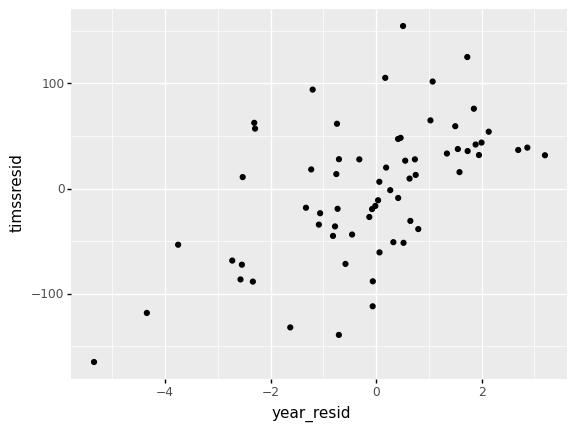

<ggplot: (163754673628)>

In [48]:
ggplot(data=year_and_timss_res) + geom_point(aes(x='year_resid', y='timssresid'))

We can also plot the relation between pirls residuals and years residuals

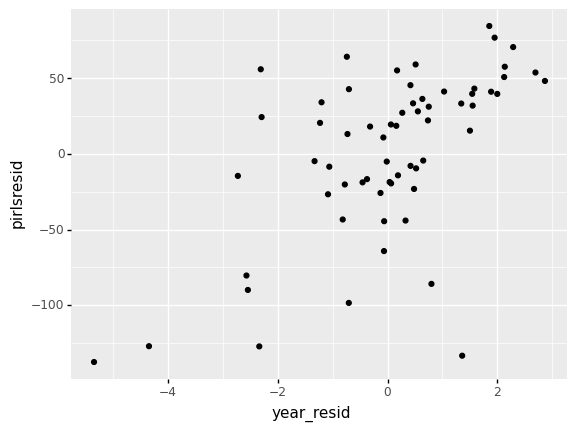

<ggplot: (163754553001)>

In [49]:
ggplot(data=year_and_pirls_res) + geom_point(aes(x='year_resid', y='pirlsresid'))

We will now perform a regression analysis for the relation of each of the 2 plots above (one for year residuals and timss residuals and one for year residuals and pirls residuals)

We start with timss residuals and years residuals regression with timss as dependent.

In [50]:
mod = smf.ols("timssresid ~ year_resid", data=year_and_timss_res)
year_and_timss_res_result = mod.fit()
year_and_timss_res_result.params

Intercept      1.415540
year_resid    21.585637
dtype: float64

In [51]:
year_and_timss_res_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             timssresid   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           1.03e-06
Time:                        15:59:50   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4155      6.734      0.210      0.834     -12.041      14.872
year_resid    21.5856      3.988      5.413      0.000      13.617      29.554
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.934
Skew:                           0.370   Prob(JB):                        0.380
Kurtosis:                       3.407   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The low R-Squared indicates that the model explains very little of the variability of the response data around its mean.

The p-value is above 0,05 which is a bad sign and can be interpreted as that the result is probably not accurate.

We continue with pirls residuals and years residuals regression with pirls ad dependent

In [52]:
mod = smf.ols("pirlsresid ~ year_resid", data=year_and_pirls_res)
year_and_pirls_res_result = mod.fit()
year_and_pirls_res_result.params

Intercept      0.694772
year_resid    20.253116
dtype: float64

In [53]:
year_and_pirls_res_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pirlsresid   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.27e-07
Time:                        15:59:51   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6948      5.509      0.126      0.900     -10.320      11.710
year_resid    20.2531      3.475      5.828      0.000      13.304      27.202
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.484
Skew:                          -0.843   Prob(JB):                     2.16e-05
Kurtosis:                       5.311   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The low R-Squared indicates that the model explains very little of the variability of the response data around its mean.

The p-value is above 0,05 which is a bad sign and can be interpreted as that the result is probably not accurate.

# Third Question 
### "Compare New and Previous Estimates"

To see if the results of the authors make sense, we can compare their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper.

In order to do this, we will need the following file:

* ```HLO Panel Data (mean, thresh) - Jan 2018.dta```, which contains learning outcome estimates from the World Bank.

The percentage of subjects above the 400 mark is given by the low_threshold column in the above file, and this can be used to check the new estimates of the authors. To compare the new and the previous estimates, we will run a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS. We will use the latest year for which estimates are available for each country. 

Finally, we will create two plots to depict the two relationships.


We will firstly read the file that is needed and insert the data into a dataframe called paneldata2018.

In [54]:
#Read data
paneldata2018 = pd.read_stata(r'Replication Files\DATA\HLO Panel Data (mean, thresh) - Jan 2018.dta')
#Visulise the dataframe created.
paneldata2018

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


Before moving on we will remove all rows that have nan in the low_threshold column, which is the one we need.

In [55]:
paneldata2018 = paneldata2018.dropna(subset=['low_threshold'])
paneldata2018

,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000
...,...,...,...,...,...,...
1824,Zambia,894,ZMB,2005,324.459991,27.500000
1833,Zanzibar,9834,ZAN,1995,347.700012,17.840000
1834,Zanzibar,9834,ZAN,2000,310.540009,34.330002
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001


We will need the latest year for which estimates are available for each country.

In order to do that we will sort out dataframe by year.

In [56]:
paneldata2018 = paneldata2018.sort_values(by=['year'], ascending=False)
paneldata2018

,country,idcntry,cntabb,year,HLO,low_threshold
1273,Northern Ireland,928,NIR,2015,564.280029,95.070000
372,Chinese Taipei,158,TWN,2015,597.750000,97.330002
1538,Slovakia,703,SVK,2015,495.320007,85.870003
647,Georgia,268,GEO,2015,459.679993,80.500000
999,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
...,...,...,...,...,...,...
342,Chile,152,CHL,1970,340.609985,40.790001
605,France,250,FRA,1970,438.910004,88.610001
814,Japan,392,JPN,1970,547.770020,91.629997
133,Belgium Flemish,5602,BFL,1970,486.320007,92.389999


 We will then remove duplicate countries, and only the first one will remain, achieving our goal of keeping the most recent (as they are sorted by year)

In [57]:
paneldata2018.drop_duplicates(subset=['idcntry'], keep='first', inplace=True)
paneldata2018

,country,idcntry,cntabb,year,HLO,low_threshold
1273,Northern Ireland,928,NIR,2015,564.280029,95.070000
372,Chinese Taipei,158,TWN,2015,597.750000,97.330002
1538,Slovakia,703,SVK,2015,495.320007,85.870003
647,Georgia,268,GEO,2015,459.679993,80.500000
999,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
...,...,...,...,...,...,...
633,Gambia,270,GMB,2000,267.320007,36.529999
182,Bolivia Plurinational State of,68,BOL,1995,370.399994,53.610001
149,Belgium French,5601,BFR,1995,500.390015,93.320000
1247,Nigeria,566,NGA,1995,241.179993,45.020000


In order to merge this table with the one containing the timss score, we will rename the column with the same name of the country_score table.

In [58]:
paneldata2018 = paneldata2018.rename(columns={"cntabb": "Country Code"})
paneldata2018

,country,idcntry,Country Code,year,HLO,low_threshold
1273,Northern Ireland,928,NIR,2015,564.280029,95.070000
372,Chinese Taipei,158,TWN,2015,597.750000,97.330002
1538,Slovakia,703,SVK,2015,495.320007,85.870003
647,Georgia,268,GEO,2015,459.679993,80.500000
999,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
...,...,...,...,...,...,...
633,Gambia,270,GMB,2000,267.320007,36.529999
182,Bolivia Plurinational State of,68,BOL,1995,370.399994,53.610001
149,Belgium French,5601,BFR,1995,500.390015,93.320000
1247,Nigeria,566,NGA,1995,241.179993,45.020000


We will now merge the 2 tables

In [59]:
estimates_with_scores = pd.merge(paneldata2018, 
               country_scores, 
               on='Country Code',
               how='inner')
estimates_with_scores

,country,idcntry,Country Code,year,HLO,low_threshold,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Slovakia,703,SVK,2015,495.320007,85.870003,Slovak Republic,90.0,95.752808,513.000000,541.000000
1,Georgia,268,GEO,2015,459.679993,80.500000,Georgia,72.0,86.485489,456.000000,494.000000
2,Slovenia,705,SVN,2015,518.039978,95.220001,Slovenia,94.0,95.474426,517.000000,535.000000
3,Bulgaria,100,BGR,2015,490.670013,78.879997,Bulgaria,NaN,93.048439,NaN,541.000000
4,South Africa,710,ZAF,2015,374.059998,53.200001,South Africa,NaN,24.000000,NaN,323.000000
...,...,...,...,...,...,...,...,...,...,...,...
72,Senegal,686,SEN,2005,319.540009,31.660000,Senegal,56.0,46.000000,426.151825,406.763458
73,Cameroun,120,CMR,2005,336.640015,44.500000,Cameroon,41.0,46.000000,375.240479,390.343994
74,Burkina Faso,854,BFA,2005,296.880005,37.139999,Burkina Faso,59.0,45.000000,422.527435,395.008057
75,Benin,204,BEN,2005,279.029999,24.350000,Benin,35.0,35.000000,390.949188,394.196686


We can now plot the relation between the new estimates for TIMSS and the previous estimates

C:\Users\Sterg\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


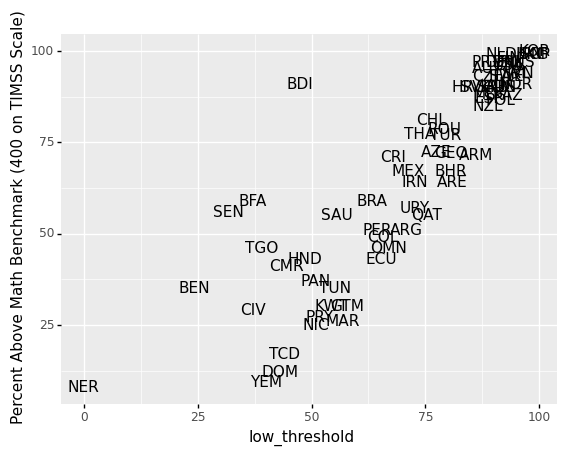

<ggplot: (163754752509)>

In [60]:
ggplot(data=estimates_with_scores)+\
geom_text(aes(x="low_threshold",y="Percent Above Math Benchmark (400 on TIMSS Scale)",label="Country Code"))

We can do the same for the new estimates for PIRLS and the previous estimates

C:\Users\Sterg\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_text : Removed 12 rows containing missing values.


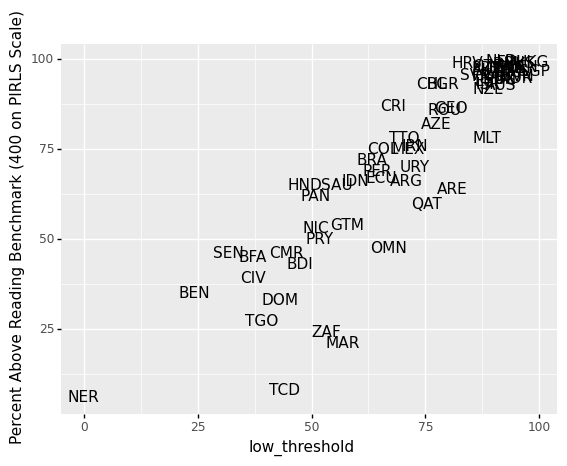

<ggplot: (163754909049)>

In [61]:
ggplot(data=estimates_with_scores)+\
geom_text(aes(x="low_threshold",y="Percent Above Reading Benchmark (400 on PIRLS Scale)",label="Country Code"))

We will also run a Spearman test between the new estimates for TIMSS and the previous estimates

In [62]:
X=estimates_with_scores["low_threshold"]
Y=estimates_with_scores["Percent Above Math Benchmark (400 on TIMSS Scale)"]
print('Spearman', stats.spearmanr(X, Y,nan_policy='omit'))

Spearman SpearmanrResult(correlation=0.8973790562032016, pvalue=1.687973764124364e-25)


The closer correlation is to +1 or -1, the stronger the likely correlation. 
0,89 is close to a perfect positive correlation (which is +1). Thus the value 0,89 suggests a fairly strong positive relationship.
The p-value is extremely small indicating that the result is concrete.

We will do the same test for PIRLS

In [63]:
X=estimates_with_scores["low_threshold"]
Y=estimates_with_scores["Percent Above Reading Benchmark (400 on PIRLS Scale)"]
print('Spearman', stats.spearmanr(X, Y,nan_policy='omit'))

Spearman SpearmanrResult(correlation=0.9045173418249433, pvalue=5.290584772193416e-25)


0,9 is close to a perfect positive correlation (which is +1). Thus the value 0,9 suggests a fairly strong positive relationship.
The p-value is extremely small indicating that the result is concrete.

# Fourth Question
### "Skills Intensity"

For this question we will study the relationship between the skills of the people in each country and the value of its exports, as described in Section 4.2 of the original paper. We will do this with performing four regressions:


$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In the above:

* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

* $\mathrm{highschool}$ is the portion of employees in industry $i$ with at least a high school degree 

We will print a summary where we wll be able to see the $R^2$ and the intercept for the interaction terms in each of the models.

 Apart from `country_scores`, we will need the following files:

* `usa_00001.csv.gz`

* `cw_ind2000_ind1990ddx.dta`

* `BACI_HS17_Y2018_V202001.csv.gz`

* `cw_hs6_sic87dd.dta`

* `cw_sic87_ind1990ddx.dta`

* `country_codes_V202001.csv.gz`

Do we have the data needed for this Question?  
  
We already have country_scores as a dataframe.  
We have usa_00001.csv in the US_2000_Census dataframe.  
We have BACI_HS17_Y2018_V202001 in the BACI dataframe.  
We have country_codes_V202001 in the Country_Codes dataframe  

We will import cw_ind2000_ind1990ddx into a dataframe

In [64]:
#Read data
cw_ind2000_ind1990 = pd.read_stata(r'Replication Files\DATA\cw_ind2000_ind1990ddx.dta')
#Visulise the dataframe created.
cw_ind2000_ind1990.sort_values(by=['ind1990ddx'])
#cw_ind2000_ind1990

,ind2000,ind1990ddx,weight
0,17,10,0.994016
10,29,10,0.349020
4,18,11,0.990907
673,909,20,0.156070
529,748,20,1.000000
...,...,...,...
704,949,930,0.664873
435,629,931,0.023434
705,949,931,0.074853
708,957,931,0.983767


We will now import cw_hs6_sic87dd.dta into a dataframe

In [65]:
#Read data
cw_hs6 = pd.read_stata(r'Replication Files\DATA\cw_hs6_sic87dd.dta')
#Visulise the dataframe created.
cw_hs6

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


Finally we will import cw_sic87_ind1990ddx.dta into a dataframe

In [66]:
#Read data
cw_sic87_ind1990 = pd.read_stata(r'Replication Files\DATA\cw_sic87_ind1990ddx.dta')
#Visulise the dataframe created.
cw_sic87_ind1990

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


We can now start working on the question

From the data in `usa_00001.csv.gz` we will identify college graduates, using the rule that they have at least 10 years of education. Similarly, we will identify high school graduates, using the rule that they have at least 6 years of education. 

#### From now on we refer to high school graduates as "students" for quick reference
We will identify high school graduates, using the rule that they have at least 6 years of education.

In [67]:
#keep only the columns needed from census
US_2000_Census = US_2000_Census[["EDUC","IND","PERWT"]]
US_2000_Census['Students'] = np.where(US_2000_Census['EDUC']>= 6,"Student", "None")
US_2000_Census

<ipython-input-67-9a715e4541ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,EDUC,IND,PERWT,Students
0,8,797,618.0,Student
1,8,467,684.0,Student
2,6,359,618.0,Student
3,6,617,609.0,Student
4,6,877,621.0,Student
...,...,...,...,...
371613,6,708,606.0,Student
371614,1,0,494.0,None
371615,6,337,556.0,Student
371616,6,759,600.0,Student


#### From now on we refer to college graduates as "graduates" for quick reference
In US_2000_Census we will identify college graduates, using the rule that they have at least 10 years of education.  

In [68]:
US_2000_Census['Graduates'] = np.where(US_2000_Census['EDUC']>= 10,'College graduate',"None")
US_2000_Census.sort_values(by='IND', inplace=True)
US_2000_Census

<ipython-input-68-6c1a70ca604d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-68-6c1a70ca604d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,EDUC,IND,PERWT,Students,Graduates
185808,4,0,645.0,None,None
192695,2,0,565.0,None,None
192698,2,0,579.0,None,None
192699,1,0,648.0,None,None
192700,1,0,555.0,None,None
...,...,...,...,...,...
107953,5,992,473.0,None,None
107957,4,992,493.0,None,None
314332,10,992,752.0,Student,College graduate
311653,4,992,530.0,None,None


For every different industry in the census data, we will calculate the weighted average of college graduates and high school graduates, using the `PERWT` attribute, which shows how many persons in the US population are represented by a given person in the data. We will create a `DataFrame` that contains the industry, the weighted average for college graduates, and the weighted average for high school graduates. We'll call that the `skills_intensity_industry` `DataFrame`, as it shows, for every industry the intensity of skills of the people working in that particular industry in the 2000 census.

We will get the total number of "weights" per industry by grouping by industry and summing the PERWT column

In [69]:
census_per_ind = US_2000_Census\
                       .groupby(['IND'
])['PERWT'].sum()\
   .sort_values(ascending=False).to_frame('Total').reset_index()
census_per_ind

,IND,Total
0,0,108371644.0
1,77,10774622.0
2,786,9320443.0
3,868,8882284.0
4,819,6191279.0
...,...,...
261,19,32080.0
262,39,30437.0
263,978,27502.0
264,218,26319.0


We will now create 2 dataframes, one for the students and one for the graduates, that will contain only the rows that are students or graduates correspondingly

In [70]:
students = US_2000_Census[US_2000_Census['Students'].isin(['Student'])]
graduates = US_2000_Census[US_2000_Census['Graduates'].isin(['College graduate'])]
#visualise one of the 2 dataframes
students

,EDUC,IND,PERWT,Students,Graduates
192707,7,0,327.0,Student,None
192708,11,0,308.0,Student,College graduate
192719,6,0,574.0,Student,None
192722,6,0,633.0,Student,None
192744,6,0,606.0,Student,None
...,...,...,...,...,...
204399,6,992,559.0,Student,None
332945,6,992,2179.0,Student,None
50529,6,992,1947.0,Student,None
314332,10,992,752.0,Student,College graduate


We can now get the total "weight" for each category (student and graduate) per industry by grouping by industry and summing the PERWT column (for each category seperately)
For example students_per_ind contains the industry and the weight for this industry, for students.  

In [71]:
students_per_ind = students\
                       .groupby(['IND'
])['PERWT'].sum()\
   .sort_values(ascending=False).to_frame('Total students').reset_index()


graduates_per_ind = graduates\
                       .groupby(['IND'
])['PERWT'].sum()\
   .sort_values(ascending=False).to_frame('Total graduates').reset_index()
#Visualise one of the dataframes created
graduates_per_ind

,IND,Total graduates
0,786,5622028.0
1,0,5117532.0
2,819,2267702.0
3,787,1991180.0
4,699,1051408.0
...,...,...
260,248,3974.0
261,147,3803.0
262,379,3498.0
263,367,2189.0


For each category We will now bring together the 2 dataframes (students and graduates) and we will create columns containing the weighted average (per industry).

In [72]:
per_ind = \
pd.merge(census_per_ind, students_per_ind, how='left', on=['IND'])
per_ind = \
pd.merge(per_ind, graduates_per_ind, how='left', on=['IND'])
per_ind["Students percentage"] = per_ind["Total students"]/per_ind["Total"]
per_ind["Graduates percentage"] = per_ind["Total graduates"]/per_ind["Total"]
per_ind

,IND,Total,Total students,Total graduates,Students percentage,Graduates percentage
0,0,108371644.0,28314555.0,5117532.0,0.261273,0.047222
1,77,10774622.0,8487604.0,1023147.0,0.787740,0.094959
2,786,9320443.0,8851889.0,5622028.0,0.949728,0.603193
3,868,8882284.0,5808538.0,628864.0,0.653946,0.070800
4,819,6191279.0,5894977.0,2267702.0,0.952142,0.366274
...,...,...,...,...,...,...
261,19,32080.0,29645.0,10095.0,0.924096,0.314682
262,39,30437.0,26827.0,4326.0,0.881394,0.142130
263,978,27502.0,24851.0,5411.0,0.903607,0.196749
264,218,26319.0,23610.0,8338.0,0.897071,0.316805


We will now create a DataFrame that contains the industry, the weighted average for college graduates, and the weighted average for high school graduates.   
We'll call that the skills_intensity_industry DataFrame, as it shows, for every industry the intensity of skills of the people working in that particular industry in the 2000 census.

#### Note: In one industry there are not any graduate students, and thus the value of this row for graduate students will be NaN

In [73]:
skills_intensity_industry = per_ind[["IND","Students percentage","Graduates percentage"]]
skills_intensity_industry

,IND,Students percentage,Graduates percentage
0,0,0.261273,0.047222
1,77,0.787740,0.094959
2,786,0.949728,0.603193
3,868,0.653946,0.070800
4,819,0.952142,0.366274
...,...,...,...
261,19,0.924096,0.314682
262,39,0.881394,0.142130
263,978,0.903607,0.196749
264,218,0.897071,0.316805


The census data is from 2000 so the data are about the interval from 1990 to 2000. The industry codes for 1990, however, are not the same with the industry codes used in 2000. The `cw_ind2000_ind1990ddx.dta` file maps industry codes of 1990 and 2000, with a weight to account for the differences in the ten years. We will use that file to reweight the weighted averages in `skills_intensity_industry` with the corresponding weight in each mapping.

Here we take the skills intensity dataframe and bring next to it the cw_ind1990 codes with an inner merge based on the 2000 industry code. (for the one dataframe its names as IND and for the other as ind2000)

In [74]:
skills_intensity_industry_reweighted = \
pd.merge(skills_intensity_industry, cw_ind2000_ind1990, how='inner', left_on=['IND'], right_on=['ind2000'])
skills_intensity_industry_reweighted

,IND,Students percentage,Graduates percentage,ind2000,ind1990ddx,weight
0,77,0.787740,0.094959,77,60,0.973557
1,77,0.787740,0.094959,77,440,0.002678
2,77,0.787740,0.094959,77,441,0.002211
3,77,0.787740,0.094959,77,512,0.004872
4,77,0.787740,0.094959,77,580,0.001718
...,...,...,...,...,...,...
707,299,0.884317,0.131522,299,301,1.000000
708,19,0.924096,0.314682,19,31,1.000000
709,39,0.881394,0.142130,39,40,1.000000
710,218,0.897071,0.316805,218,191,1.000000


We can now reweight the averages by multiplying each average with the coresponding weight.

In [75]:
#Students reweight
skills_intensity_industry_reweighted["Students Reweight"] =\
        skills_intensity_industry_reweighted["Students percentage"]*skills_intensity_industry_reweighted["weight"]


#Graduates reweight
skills_intensity_industry_reweighted["Graduates Reweight"] =\
        skills_intensity_industry_reweighted["Graduates percentage"]*skills_intensity_industry_reweighted["weight"]

#keep only the columns needed
skills_intensity_industry_reweighted = skills_intensity_industry_reweighted[["ind1990ddx","Students Reweight","Graduates Reweight"]]
#Visualize result dataframe
skills_intensity_industry_reweighted

,ind1990ddx,Students Reweight,Graduates Reweight
0,60,0.766910,0.092448
1,440,0.002109,0.000254
2,441,0.001742,0.000210
3,512,0.003838,0.000463
4,580,0.001353,0.000163
...,...,...,...
707,301,0.884317,0.131522
708,31,0.924096,0.314682
709,40,0.881394,0.142130
710,191,0.897071,0.316805


Finally, we group by industry and sum, and then rename our columns to "School" and "College" to be more accurate (we used the terminology students and graduates so far that was not very related to the values that they represent)

In [76]:
#group by industry summing averages
skills_intensity_industry_reweighted= skills_intensity_industry_reweighted\
                       .groupby(['ind1990ddx'
]).sum()
#rename columns
skills_intensity_industry_reweighted = skills_intensity_industry_reweighted.rename(columns={"Students Reweight": "School", "Graduates Reweight": "College"})
skills_intensity_industry_reweighted

,School,College
ind1990ddx,,
10,0.811546,0.150558
11,0.707853,0.097209
20,2.010865,0.559366
31,1.059608,0.346429
32,0.648069,0.174943
...,...,...
921,0.990417,0.350704
922,0.866422,0.404272
930,0.641594,0.344167


Then we will take on the `BACI_HS17_Y2018_V202001.csv.gz` file. That one contains records showing the exports of different countries in 2018 for different industry sectors. In particular, the columns of the file are:

* `t`: year
* `i`: exporter (ISO 3-digit country code)
* `j`: importer (ISO 3-digit country code)
* `k`: product category (Harmonized System, HS, 6-digit code)
* `v`: value of the trade flow (in thousands current USD)
* `q`: quantity (in metric tons)

In [77]:
#visulize BACI
BACI

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


The HS 6-digit code must be mapped to the industry codes we are using in the rest of the data. This can be done in two steps. First, with the `cw_hs6_sic87dd.dta` we can map the HS 6-digit code with Standard Industrial Codes (SIC) SIC87 industry codes. Let's see the file first

In [78]:
# Visulize dataframe
cw_hs6

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


We can now merge the BACI with the hs6 dataframe so we can map the codes.

In [79]:
BACI_sic = \
pd.merge(BACI, cw_hs6 , how='inner', left_on=['k'], right_on=['hs6'])
BACI_sic

,t,i,j,k,v,q,hs6,sic87dd,share,weights_method
0,2018,4,24,845420,101.397000,26.000000,845420.0,3321.0,0.636426,trade-based
1,2018,4,24,845420,101.397000,26.000000,845420.0,3559.0,0.363574,trade-based
2,2018,36,288,845420,16.384946,0.177000,845420.0,3321.0,0.636426,trade-based
3,2018,36,288,845420,16.384946,0.177000,845420.0,3559.0,0.363574,trade-based
4,2018,36,360,845420,7.109000,0.017000,845420.0,3321.0,0.636426,trade-based
...,...,...,...,...,...,...,...,...,...,...
9631891,2018,842,124,811251,3.370410,0.019558,811251.0,3399.0,1.000000,no weights needed
9631892,2018,842,156,811251,3.005000,0.002000,811251.0,3399.0,1.000000,no weights needed
9631893,2018,842,276,811251,31.709764,0.186699,811251.0,3399.0,1.000000,no weights needed
9631894,2018,842,410,811251,20.110000,0.010000,811251.0,3399.0,1.000000,no weights needed


We will need to adjust the value of the trade flow of the BACI file with the `share` column of `cw_hs6_sic87dd.dta`. We will do that by multiplying the v column with the share column.

In [80]:
BACI_sic["adjusted value"] = BACI_sic["v"]*BACI_sic["share"]
BACI_sic

,t,i,j,k,v,q,hs6,sic87dd,share,weights_method,adjusted value
0,2018,4,24,845420,101.397000,26.000000,845420.0,3321.0,0.636426,trade-based,64.531708
1,2018,4,24,845420,101.397000,26.000000,845420.0,3559.0,0.363574,trade-based,36.865292
2,2018,36,288,845420,16.384946,0.177000,845420.0,3321.0,0.636426,trade-based,10.427809
3,2018,36,288,845420,16.384946,0.177000,845420.0,3559.0,0.363574,trade-based,5.957137
4,2018,36,360,845420,7.109000,0.017000,845420.0,3321.0,0.636426,trade-based,4.524354
...,...,...,...,...,...,...,...,...,...,...,...
9631891,2018,842,124,811251,3.370410,0.019558,811251.0,3399.0,1.000000,no weights needed,3.370410
9631892,2018,842,156,811251,3.005000,0.002000,811251.0,3399.0,1.000000,no weights needed,3.005000
9631893,2018,842,276,811251,31.709764,0.186699,811251.0,3399.0,1.000000,no weights needed,31.709764
9631894,2018,842,410,811251,20.110000,0.010000,811251.0,3399.0,1.000000,no weights needed,20.110000


We can now group the trade flow by exporter and SIC87 industry code, so that we have the total value per exporter and industry. 

In [81]:
grouped_BACI = BACI_sic\
                       .groupby(['i','sic87dd'])['v'].sum().to_frame('Total value').reset_index()
   #.sort_values(ascending=False)

grouped_BACI = grouped_BACI.rename(columns={"i": "Exporter"})
grouped_BACI

,Exporter,sic87dd,Total value
0,4,119.0,68291.848724
1,4,131.0,39698.892614
2,4,132.0,43.993665
3,4,134.0,380.462682
4,4,139.0,14319.923893
...,...,...,...
67623,894,3996.0,1.928000
67624,894,3999.0,5777.692384
67625,894,9100.0,46122.313240
67626,894,9200.0,15068.458988


We will now use the `cw_sic87_ind1990ddx.dta` file to map the SIC87 industry codes to the 1990 census industry codes. Let's see the file again

In [82]:
#Vizualize sic89_ind1990
cw_sic87_ind1990

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


We can now map the codes by inner merging based on the sic87 code, and then we will have next to it the ind1990 code.

In [83]:
grouped_BACI_1990 = \
pd.merge(grouped_BACI, cw_sic87_ind1990 , how='inner', left_on=['sic87dd'], right_on=['sic87'])
grouped_BACI_1990

,Exporter,sic87dd,Total value,ind1990ddx,sic87
0,4,119.0,68291.848724,10,119
1,8,119.0,626.318915,10,119
2,12,119.0,152.135916,10,119
3,16,119.0,2.329000,10,119
4,20,119.0,6.597711,10,119
...,...,...,...,...,...
67047,757,3761.0,18171.410000,362,3761
67048,784,3761.0,30247.591000,362,3761
67049,792,3761.0,77.426000,362,3761
67050,826,3761.0,377692.594728,362,3761


There is one last problem. The exporter countries are given with the ISO 3-digit country codes, but we need to three letter country code that is used in the rest of our data. To do the mapping we can use the `country_codes_V202001.csv` file. Let's see that file

In [84]:
#Visulize country codes 
Country_Codes

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


We can now map the codes by inner merging based on the exporter code(or country code on the other file), and then we will have next to it the iso_3digit_alpha.

In [85]:
grouped_BACI_1990_withISO = \
pd.merge(grouped_BACI_1990, Country_Codes , how='inner', left_on=['Exporter'], right_on=['country_code'])
grouped_BACI_1990_withISO

,Exporter,sic87dd,Total value,ind1990ddx,sic87,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,119.0,68291.848724,10,119,4,Afghanistan,Afghanistan,AF,AFG
1,4,131.0,39698.892614,10,131,4,Afghanistan,Afghanistan,AF,AFG
2,4,132.0,43.993665,10,132,4,Afghanistan,Afghanistan,AF,AFG
3,4,134.0,380.462682,10,134,4,Afghanistan,Afghanistan,AF,AFG
4,4,139.0,14319.923893,10,139,4,Afghanistan,Afghanistan,AF,AFG
...,...,...,...,...,...,...,...,...,...,...
67047,876,3845.0,3.036000,372,3845,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
67048,876,3931.0,5.907000,390,3931,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
67049,876,3272.0,1.043000,251,3272,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
67050,876,3273.0,1.043000,251,3273,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF


After all this, we can create a `DataFrame`, let us name it `exports`, which contains, for each country, the value of its exports, per the 2018 year, per industry. 

In [86]:
exports = grouped_BACI_1990_withISO[["iso_3digit_alpha","ind1990ddx","Total value"]]
exports

,iso_3digit_alpha,ind1990ddx,Total value
0,AFG,10,68291.848724
1,AFG,10,39698.892614
2,AFG,10,43.993665
3,AFG,10,380.462682
4,AFG,10,14319.923893
...,...,...,...
67047,WLF,372,3.036000
67048,WLF,390,5.907000
67049,WLF,251,1.043000
67050,WLF,251,1.043000


Now we can join the `exports` `DataFrame` with the `skills_intensity_industry` `DataFrame` and the `country_scores` `DataFrame`, so that we get for each country, value of exports per industry and the weighted average of high school graduates and college graduates. This will allow us to study the relationship between the value of exports in the country and the skills possessed by the workforce in the country.

We will firstly merge country scores and exeports based on the iso3digit (or country code on the other dataframe).

In [87]:
Final_dataframe =\
pd.merge(country_scores, exports , how='inner', left_on=['Country Code'], right_on=['iso_3digit_alpha'])
Final_dataframe

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",iso_3digit_alpha,ind1990ddx,Total value
0,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,281011.661036
1,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,6151.294980
2,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,13392.163626
3,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,17979.834331
4,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,102345.598471
...,...,...,...,...,...,...,...,...,...
30365,South Africa,ZAF,NaN,24.000000,NaN,323.0,ZAF,192,8037.665669
30366,South Africa,ZAF,NaN,24.000000,NaN,323.0,ZAF,370,11637.957419
30367,South Africa,ZAF,NaN,24.000000,NaN,323.0,ZAF,40,253394.873300
30368,South Africa,ZAF,NaN,24.000000,NaN,323.0,ZAF,292,504.262000


And we can now perform our last merge of the dataframe above with the skills intensity dataframe based on the ind1990 code

In [88]:
Final_dataframe_2 =\
pd.merge(Final_dataframe,skills_intensity_industry_reweighted , how='inner', on=['ind1990ddx'])
Final_dataframe_2

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",iso_3digit_alpha,ind1990ddx,Total value,School,College
0,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,281011.661036,0.811546,0.150558
1,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,6151.294980,0.811546,0.150558
2,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,13392.163626,0.811546,0.150558
3,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,17979.834331,0.811546,0.150558
4,U.A.E.,ARE,64.0,63.982311,437.0,440.0,ARE,10,102345.598471,0.811546,0.150558
...,...,...,...,...,...,...,...,...,...,...,...
30365,Turkey,TUR,77.0,NaN,477.0,NaN,TUR,362,77.426000,0.968757,0.499685
30366,United States,USA,96.0,97.517357,544.0,560.0,USA,362,62524.728421,0.968757,0.499685
30367,United States,USA,96.0,97.517357,544.0,560.0,USA,362,238264.113571,0.968757,0.499685
30368,South Africa,ZAF,NaN,24.000000,NaN,323.0,ZAF,362,100.014450,0.968757,0.499685


Before we move on to the regressions we will find the log of some columns as it is required to perform these regressions. We will also perform a division needed and rename some columns to use them in the regression.

In [89]:
#Change income to log
Final_dataframe_2["Log_Total_value"] = np.log(Final_dataframe_2["Total value"])
#Divide timss by 1000
Final_dataframe_2["Median Math Score (TIMSS Scale, 4th Grade)"]= \
                        Final_dataframe_2["Median Math Score (TIMSS Scale, 4th Grade)"]/1000
#Divide pirls by 1000
Final_dataframe_2["Median Reading Score (PIRLS Scale, 4th Grade)"]= \
                        Final_dataframe_2["Median Reading Score (PIRLS Scale, 4th Grade)"]/1000
#Rename columns of timss and pirls
Final_dataframe_2 = Final_dataframe_2.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)": "timss"})
Final_dataframe_2 = Final_dataframe_2.rename(columns={"Median Reading Score (PIRLS Scale, 4th Grade)": "pirls"})
#Visulize result
Final_dataframe_2

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),timss,pirls,iso_3digit_alpha,ind1990ddx,Total value,School,College,Log_Total_value
0,U.A.E.,ARE,64.0,63.982311,0.437,0.440,ARE,10,281011.661036,0.811546,0.150558,12.546151
1,U.A.E.,ARE,64.0,63.982311,0.437,0.440,ARE,10,6151.294980,0.811546,0.150558,8.724418
2,U.A.E.,ARE,64.0,63.982311,0.437,0.440,ARE,10,13392.163626,0.811546,0.150558,9.502425
3,U.A.E.,ARE,64.0,63.982311,0.437,0.440,ARE,10,17979.834331,0.811546,0.150558,9.797006
4,U.A.E.,ARE,64.0,63.982311,0.437,0.440,ARE,10,102345.598471,0.811546,0.150558,11.536111
...,...,...,...,...,...,...,...,...,...,...,...,...
30365,Turkey,TUR,77.0,NaN,0.477,NaN,TUR,362,77.426000,0.968757,0.499685,4.349323
30366,United States,USA,96.0,97.517357,0.544,0.560,USA,362,62524.728421,0.968757,0.499685,11.043317
30367,United States,USA,96.0,97.517357,0.544,0.560,USA,362,238264.113571,0.968757,0.499685,12.381135
30368,South Africa,ZAF,NaN,24.000000,NaN,0.323,ZAF,362,100.014450,0.968757,0.499685,4.605315


### Regresssions

We will first run the following regression: log(𝑉𝑐𝑖)∼TIMSS𝑐/1000:college𝑖+𝑖+𝑐

In [90]:
mod = smf.ols("Log_Total_value ~ timss:College+C(ind1990ddx)+C(iso_3digit_alpha)", data=Final_dataframe_2, missing="drop")
timss_college_result = mod.fit()
timss_college_result.params

Intercept                     10.144247
C(ind1990ddx)[T.11]           -1.418490
C(ind1990ddx)[T.31]           -0.151030
C(ind1990ddx)[T.32]           -0.567750
C(ind1990ddx)[T.40]           -0.887314
                                ...    
C(iso_3digit_alpha)[T.URY]    -4.764351
C(iso_3digit_alpha)[T.USA]     2.180088
C(iso_3digit_alpha)[T.YEM]    -7.550726
C(iso_3digit_alpha)[T.ZAF]     0.000000
timss:College                 11.385854
Length: 159, dtype: float64

In [91]:
#Print result
timss_college_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_Total_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     284.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:59:56   Log-Likelihood:                -61635.
No. Observations:               27490   AIC:                         1.236e+05
Df Residuals:                   27338   BIC:                         1.248e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1442      0.154     65.749      0.000       9.842      10.447
C(ind1990ddx)[T.11]           -1.4185      0.132    -10.771      0.000      -1.677      -1.160
C(ind1990ddx)[T.31]           -0.1510      0.308     -0.490      0.624      -0.756       0.454
C(ind1990ddx)[T.32]           -0.5678      0.184     -3.093      0.002      -0.928      -0.208
C(ind1990ddx)[T.40]           -0.8873      0.141     -6.286      0.000      -1.164      -0.611
C(ind1990ddx)[T.41]           -1.3121      0.268     -4.887      0.000      -1.838      -0.786
C(ind1990ddx)[T.42]            2.8279      0.355      7.964      0.000       2.132       3.524
C(ind1990ddx)[T.50]           -0.6832      0.135     -5.058      0.000      -0.948      -0.418
C(ind1990ddx)[T.100]           2.6970      0.219     12.306      0.000       2.267       3.127
C(ind1990ddx)[T.101]           1.4844      0.152      9.783      0.000       1.187       1.782
C(ind1990ddx)[T.102]           1.7715      0.145     12.256      0.000       1.488       2.055
C(ind1990ddx)[T.110]           0.1453      0.130      1.118      0.264      -0.110       0.400
C(ind1990ddx)[T.111]           1.8639      0.286      6.507      0.000       1.302       2.425
C(ind1990ddx)[T.112]           1.6073      0.147     10.902      0.000       1.318       1.896
C(ind1990ddx)[T.120]           0.7527      0.142      5.293      0.000       0.474       1.031
C(ind1990ddx)[T.121]           0.7094      0.113      6.288      0.000       0.488       0.931
C(ind1990ddx)[T.130]          -1.6460      0.182     -9.064      0.000      -2.002      -1.290
C(ind1990ddx)[T.132]          -0.7981      0.173     -4.618      0.000      -1.137      -0.459
C(ind1990ddx)[T.141]          -0.4453      0.287     -1.550      0.121      -1.008       0.118
C(ind1990ddx)[T.142]          -0.0034      0.137     -0.025      0.980      -0.272       0.265
C(ind1990ddx)[T.150]           0.7849      0.161      4.876      0.000       0.469       1.100
C(ind1990ddx)[T.151]          -0.3008      0.132     -2.287      0.022      -0.559      -0.043
C(ind1990ddx)[T.152]          -0.4600      0.134     -3.436      0.001      -0.722      -0.198
C(ind1990ddx)[T.160]           1.1724      0.218      5.368      0.000       0.744       1.601
C(ind1990ddx)[T.161]          -0.3215      0.126     -2.550      0.011      -0.569      -0.074
C(ind1990ddx)[T.162]          -0.2390      0.156     -1.536      0.124      -0.544       0.066
C(ind1990ddx)[T.171]          -2.3997      0.311     -7.724      0.000      -3.009      -1.791
C(ind1990ddx)[T.172]          -4.0940      0.382    -10.719      0.000      -4.843      -3.345
C(ind1990ddx)[T.180]           0.3219      0.163      1.969      0.049       0.002       0.642
C(ind1990ddx)[T.181]          -0.4391      

The R-squared is above 0,5 (it's 0,611) meaning the model explains some of the variability of the response data around its mean.

The p-value is close to 0 indicating that the result is concrete.

Also, the intercept is 10.144247.

Finally, coef and	std err are close to the ones that where reported on the original paper.	

We will now run the following regression: log(𝑉𝑐𝑖)∼PIRLS𝑐/1000:college𝑖+𝑖+𝑐

In [92]:
mod = smf.ols("Log_Total_value ~ pirls:College+C(ind1990ddx)+C(iso_3digit_alpha)", data=Final_dataframe_2, missing="drop")
pirls_college_result = mod.fit()
pirls_college_result.params

Intercept                     10.266835
C(ind1990ddx)[T.11]           -1.461265
C(ind1990ddx)[T.31]           -0.009135
C(ind1990ddx)[T.32]           -0.685741
C(ind1990ddx)[T.40]           -0.813842
                                ...    
C(iso_3digit_alpha)[T.URY]    -4.814431
C(iso_3digit_alpha)[T.USA]     2.168405
C(iso_3digit_alpha)[T.YEM]     0.000000
C(iso_3digit_alpha)[T.ZAF]    -0.585916
pirls:College                 10.611480
Length: 159, dtype: float64

In [93]:
#Print result
pirls_college_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_Total_value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     288.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:59:57   Log-Likelihood:                -58862.
No. Observations:               26401   AIC:                         1.180e+05
Df Residuals:                   26252   BIC:                         1.192e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.2668      0.158     65.017      0.000       9.957      10.576
C(ind1990ddx)[T.11]           -1.4613      0.134    -10.937      0.000      -1.723      -1.199
C(ind1990ddx)[T.31]           -0.0091      0.318     -0.029      0.977      -0.633       0.615
C(ind1990ddx)[T.32]           -0.6857      0.186     -3.687      0.000      -1.050      -0.321
C(ind1990ddx)[T.40]           -0.8138      0.142     -5.717      0.000      -1.093      -0.535
C(ind1990ddx)[T.41]           -1.2757      0.268     -4.765      0.000      -1.800      -0.751
C(ind1990ddx)[T.42]            2.8722      0.391      7.339      0.000       2.105       3.639
C(ind1990ddx)[T.50]           -0.7275      0.139     -5.236      0.000      -1.000      -0.455
C(ind1990ddx)[T.100]           2.6208      0.223     11.746      0.000       2.183       3.058
C(ind1990ddx)[T.101]           1.4452      0.155      9.350      0.000       1.142       1.748
C(ind1990ddx)[T.102]           1.7318      0.147     11.818      0.000       1.445       2.019
C(ind1990ddx)[T.110]           0.1332      0.131      1.017      0.309      -0.124       0.390
C(ind1990ddx)[T.111]           1.8057      0.290      6.235      0.000       1.238       2.373
C(ind1990ddx)[T.112]           1.6233      0.150     10.850      0.000       1.330       1.916
C(ind1990ddx)[T.120]           0.7914      0.145      5.469      0.000       0.508       1.075
C(ind1990ddx)[T.121]           0.6696      0.114      5.853      0.000       0.445       0.894
C(ind1990ddx)[T.130]          -1.8992      0.181    -10.502      0.000      -2.254      -1.545
C(ind1990ddx)[T.132]          -1.0431      0.177     -5.900      0.000      -1.390      -0.697
C(ind1990ddx)[T.141]          -0.5162      0.291     -1.776      0.076      -1.086       0.054
C(ind1990ddx)[T.142]          -0.1498      0.139     -1.080      0.280      -0.422       0.122
C(ind1990ddx)[T.150]           0.6111      0.166      3.670      0.000       0.285       0.937
C(ind1990ddx)[T.151]          -0.4227      0.142     -2.975      0.003      -0.701      -0.144
C(ind1990ddx)[T.152]          -0.5638      0.136     -4.136      0.000      -0.831      -0.297
C(ind1990ddx)[T.160]           1.3549      0.221      6.144      0.000       0.923       1.787
C(ind1990ddx)[T.161]          -0.3484      0.127     -2.735      0.006      -0.598      -0.099
C(ind1990ddx)[T.162]          -0.3351      0.159     -2.111      0.035      -0.646      -0.024
C(ind1990ddx)[T.171]          -2.3266      0.315     -7.384      0.000      -2.944      -1.709
C(ind1990ddx)[T.172]          -4.0286      0.434     -9.288      0.000      -4.879      -3.179
C(ind1990ddx)[T.180]           0.2857      0.165      1.732      0.083      -0.038       0.609
C(ind1990ddx)[T.181]          -0.3030      

The R-squared is above 0,5 (it's 0,619) meaning the model explains some of the variability of the response data around its mean.

The p-value is close to 0 indicating that the result is concrete.

Also, the intercept is  10.266835.

Finally, coef and	std err are close to the ones that where reported on the original paper.	

We will then run the following regression: log(𝑉𝑐𝑖)∼TIMSS𝑐/1000:highschool𝑖+𝑖+𝑐

In [94]:
mod = smf.ols("Log_Total_value ~ timss:School+C(ind1990ddx)+C(iso_3digit_alpha)", data=Final_dataframe_2, missing="drop")
timss_School_result = mod.fit()
timss_School_result.params

Intercept                     10.120949
C(ind1990ddx)[T.11]           -1.601302
C(ind1990ddx)[T.31]            0.616420
C(ind1990ddx)[T.32]           -0.276447
C(ind1990ddx)[T.40]           -1.013584
                                ...    
C(iso_3digit_alpha)[T.URY]    -4.765470
C(iso_3digit_alpha)[T.USA]     2.192825
C(iso_3digit_alpha)[T.YEM]    -7.581889
C(iso_3digit_alpha)[T.ZAF]     0.000000
timss:School                   2.168770
Length: 159, dtype: float64

In [95]:
#Print result
timss_School_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_Total_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -61657.
No. Observations:               27490   AIC:                         1.236e+05
Df Residuals:                   27338   BIC:                         1.249e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1209      0.186     54.538      0.000       9.757      10.485
C(ind1990ddx)[T.11]           -1.6013      0.129    -12.421      0.000      -1.854      -1.349
C(ind1990ddx)[T.31]            0.6164      0.289      2.130      0.033       0.049       1.184
C(ind1990ddx)[T.32]           -0.2764      0.185     -1.491      0.136      -0.640       0.087
C(ind1990ddx)[T.40]           -1.0136      0.142     -7.128      0.000      -1.292      -0.735
C(ind1990ddx)[T.41]           -1.8364      0.261     -7.039      0.000      -2.348      -1.325
C(ind1990ddx)[T.42]            4.2136      0.288     14.652      0.000       3.650       4.777
C(ind1990ddx)[T.50]           -1.1293      0.126     -8.942      0.000      -1.377      -0.882
C(ind1990ddx)[T.100]           2.3096      0.212     10.874      0.000       1.893       2.726
C(ind1990ddx)[T.101]           1.1305      0.148      7.651      0.000       0.841       1.420
C(ind1990ddx)[T.102]           1.6488      0.144     11.488      0.000       1.367       1.930
C(ind1990ddx)[T.110]           0.2945      0.132      2.225      0.026       0.035       0.554
C(ind1990ddx)[T.111]           1.8656      0.288      6.487      0.000       1.302       2.429
C(ind1990ddx)[T.112]           1.4502      0.146      9.958      0.000       1.165       1.736
C(ind1990ddx)[T.120]           1.0080      0.138      7.318      0.000       0.738       1.278
C(ind1990ddx)[T.121]           0.6534      0.113      5.784      0.000       0.432       0.875
C(ind1990ddx)[T.130]          -1.8220      0.182     -9.994      0.000      -2.179      -1.465
C(ind1990ddx)[T.132]          -1.1181      0.166     -6.726      0.000      -1.444      -0.792
C(ind1990ddx)[T.141]          -0.1541      0.286     -0.538      0.590      -0.715       0.407
C(ind1990ddx)[T.142]          -0.6072      0.160     -3.804      0.000      -0.920      -0.294
C(ind1990ddx)[T.150]           0.7746      0.179      4.330      0.000       0.424       1.125
C(ind1990ddx)[T.151]          -0.1933      0.154     -1.254      0.210      -0.495       0.109
C(ind1990ddx)[T.152]          -0.4893      0.138     -3.554      0.000      -0.759      -0.219
C(ind1990ddx)[T.160]           1.1007      0.222      4.969      0.000       0.667       1.535
C(ind1990ddx)[T.161]          -0.4496      0.125     -3.595      0.000      -0.695      -0.204
C(ind1990ddx)[T.162]          -0.5491      0.150     -3.666      0.000      -0.843      -0.256
C(ind1990ddx)[T.171]          -1.7925      0.301     -5.948      0.000      -2.383      -1.202
C(ind1990ddx)[T.172]          -2.1186      0.242     -8.743      0.000      -2.594      -1.644
C(ind1990ddx)[T.180]           0.5016      0.166      3.027      0.002       0.177       0.826
C(ind1990ddx)[T.181]           1.2853      

The R-squared is above 0,5 (it's 0,611) meaning the model explains some of the variability of the response data around its mean.

The p-value is close to 0 indicating that the result is concrete.

Also, the intercept is 10.120949.

Finally, coef and std err are close to the ones that where reported on the original paper.	

We will finally run the following regression: log(𝑉𝑐𝑖)∼PIRLS𝑐/1000:highschool𝑖+𝑖+𝑐

In [96]:
mod = smf.ols("Log_Total_value ~ pirls:School+C(ind1990ddx)+C(iso_3digit_alpha)", data=Final_dataframe_2, missing="drop")
pirls_School_result = mod.fit()
pirls_School_result.params

Intercept                     10.392877
C(ind1990ddx)[T.11]           -1.661578
C(ind1990ddx)[T.31]            0.792709
C(ind1990ddx)[T.32]           -0.436129
C(ind1990ddx)[T.40]           -0.914402
                                ...    
C(iso_3digit_alpha)[T.URY]    -4.808263
C(iso_3digit_alpha)[T.USA]     2.236502
C(iso_3digit_alpha)[T.YEM]     0.000000
C(iso_3digit_alpha)[T.ZAF]    -0.651932
pirls:School                   1.588126
Length: 159, dtype: float64

In [97]:
#Print result
pirls_School_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_Total_value   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     287.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:59:58   Log-Likelihood:                -58882.
No. Observations:               26401   AIC:                         1.181e+05
Df Residuals:                   26252   BIC:                         1.193e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.3929      0.194     53.452      0.000      10.012      10.774
C(ind1990ddx)[T.11]           -1.6616      0.130    -12.782      0.000      -1.916      -1.407
C(ind1990ddx)[T.31]            0.7927      0.293      2.703      0.007       0.218       1.367
C(ind1990ddx)[T.32]           -0.4361      0.188     -2.315      0.021      -0.805      -0.067
C(ind1990ddx)[T.40]           -0.9144      0.144     -6.360      0.000      -1.196      -0.633
C(ind1990ddx)[T.41]           -1.7832      0.258     -6.910      0.000      -2.289      -1.277
C(ind1990ddx)[T.42]            4.4531      0.309     14.400      0.000       3.847       5.059
C(ind1990ddx)[T.50]           -1.1560      0.128     -9.060      0.000      -1.406      -0.906
C(ind1990ddx)[T.100]           2.2169      0.214     10.345      0.000       1.797       2.637
C(ind1990ddx)[T.101]           1.1094      0.149      7.427      0.000       0.817       1.402
C(ind1990ddx)[T.102]           1.5988      0.145     11.015      0.000       1.314       1.883
C(ind1990ddx)[T.110]           0.2499      0.134      1.864      0.062      -0.013       0.513
C(ind1990ddx)[T.111]           1.7714      0.291      6.087      0.000       1.201       2.342
C(ind1990ddx)[T.112]           1.4479      0.147      9.835      0.000       1.159       1.736
C(ind1990ddx)[T.120]           1.0567      0.139      7.610      0.000       0.785       1.329
C(ind1990ddx)[T.121]           0.5922      0.115      5.169      0.000       0.368       0.817
C(ind1990ddx)[T.130]          -2.0482      0.182    -11.268      0.000      -2.405      -1.692
C(ind1990ddx)[T.132]          -1.3913      0.168     -8.267      0.000      -1.721      -1.061
C(ind1990ddx)[T.141]          -0.2407      0.289     -0.833      0.405      -0.807       0.326
C(ind1990ddx)[T.142]          -0.6392      0.168     -3.812      0.000      -0.968      -0.311
C(ind1990ddx)[T.150]           0.4773      0.189      2.523      0.012       0.106       0.848
C(ind1990ddx)[T.151]          -0.1731      0.170     -1.021      0.307      -0.505       0.159
C(ind1990ddx)[T.152]          -0.6471      0.141     -4.582      0.000      -0.924      -0.370
C(ind1990ddx)[T.160]           1.3332      0.225      5.939      0.000       0.893       1.773
C(ind1990ddx)[T.161]          -0.4776      0.126     -3.790      0.000      -0.725      -0.231
C(ind1990ddx)[T.162]          -0.6532      0.151     -4.320      0.000      -0.950      -0.357
C(ind1990ddx)[T.171]          -1.7207      0.303     -5.683      0.000      -2.314      -1.127
C(ind1990ddx)[T.172]          -1.8583      0.270     -6.878      0.000      -2.388      -1.329
C(ind1990ddx)[T.180]           0.4289      0.168      2.554      0.011       0.100       0.758
C(ind1990ddx)[T.181]           1.4011      

The R-squared is above 0,5 (it's 0,618) meaning the model explains some of the variability of the response data around its mean.

The p-value is close to 0 indicating that the result is concrete.

Also, the intercept is  10.392877.

Finally, coef and std err are close to the ones that where reported on the original paper.	

### End of the assignment
If you have any questions regarding the assignment you can contact me on my email: stergiossozos@outlook.com